# load libraries and data

In [2]:
library(MASS) 
library(rjson)
library(ggplot2)
library(reshape2)
library(ggrepel)
library(gplots)
library(seqinr)
library(gridExtra)
library(reshape2)

library(ggbiplot)
library(mixOmics)
library(ggrepel)

#######################
file_protein_structure_motif = 'annotation/05_predict_motifs/data_in/ALL.protein_structure_motif.just_glyco.rda'


#load(file_protein_structure_motif)

In [13]:
STRUCTURE = read.csv('annotation/05_predict_motifs/data_in/HIV_angstrom6/STRUCTURE.csv')
#STRUCTURE = read.csv('annotation/05_predict_motifs/data_in/HIV_ENV_angstrom10/STRUCTURE.csv')
head(STRUCTURE)

X gene_id seq_id struct_id  chain_id seq_resnum
1 1 Q2N0S5  Q2N0S5 REP-Q2N0S5 X         87       
2 2 Q2N0S5  Q2N0S5 REP-Q2N0S5 X        132       
3 3 Q2N0S5  Q2N0S5 REP-Q2N0S5 X        136       
4 4 Q2N0S5  Q2N0S5 REP-Q2N0S5 X        147       
5 5 Q2N0S5  Q2N0S5 REP-Q2N0S5 X        151       
6 6 Q2N0S5  Q2N0S5 REP-Q2N0S5 X        176       
  angstroms_to_feature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [14]:
if(length(unique(STRUCTURE$gene_id))!=1){stop('there should only be one protein')}

# HIV Mannosylation

In [15]:
e=1e-3

# load and initialize
id = 'Q2N0S5'
### figure 1d, tableS3
hiv_sites = read.csv('validation_data/HIV/Nglycans_HIVgp160.CaoPaulson2017.Area.csv')

hiv_str = unique(STRUCTURE[STRUCTURE$gene_id==id,])

m = merge(hiv_sites,hiv_str,by.x='site_uniprot',by.y='seq_resnum')

str_vars = grep('\\.',colnames(STRUCTURE),value=T)
str_vars = str_vars[!grepl('seq_RSA.accpro$|-',str_vars)]

m$HighMann_Complex = log( (m$HighMannose_N203+e)/(m$Complex_N3+e) , 10)


m

site_uniprot,Glycosite,offset,NoGlycan_N0,Complex_N3,HighMannose_N203,SE_N0,SE_N3,SE_N203,sample,⋯,struct_aa.N,struct_aa.P,struct_aa.Q,struct_aa.R,struct_aa.S,struct_aa.T,struct_aa.V,struct_aa.W,struct_aa.Y,HighMann_Complex
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
87,88,1,0.0034,0.4792,0.5174,0.0014,0.0904,0.0898,1,⋯,1,0,0,0,0,0,1,0,0,0.03324284
87,88,1,0.0031,0.5759,0.4210,0.0015,0.0895,0.0891,2,⋯,1,0,0,0,0,0,1,0,0,-0.13578809
132,133,1,0.0071,0.1081,0.8848,0.0024,0.0241,0.0255,1,⋯,1,0,0,1,0,1,1,0,0,0.90951093
132,133,1,0.0040,0.1669,0.8291,0.0016,0.0489,0.0490,2,⋯,1,0,0,1,0,1,1,0,0,0.69407972
136,137,1,0.0180,0.4528,0.5292,0.0084,0.0516,0.0512,2,⋯,2,0,0,0,0,1,0,0,0,0.06757523
136,137,1,0.0166,0.5988,0.3846,0.0082,0.0605,0.0593,1,⋯,2,0,0,0,0,1,0,0,0,-0.19186944
147,156,9,0.0012,0.2243,0.7744,0.0007,0.0873,0.0871,2,⋯,1,0,0,0,2,1,1,0,1,0.53676460
147,156,9,0.0042,0.0416,0.9542,0.0024,0.0148,0.0154,1,⋯,1,0,0,0,2,1,1,0,1,1.35068471
151,160,9,0.0162,0.2100,0.7739,0.0129,0.0801,0.0880,2,⋯,1,0,1,0,0,0,1,0,0,0.56496321


## Validation of Lysine-Mannose Association

Prelimiary visualization of the HIV envelop data: raw counts, proportional counts, and log fold change of high mannose to complex counts (top to bottom). Data was loaded from table S3 to replicate figure 1d [Cao,2017,*Nat. Comm.*]. It seems that sites 156, 160, 234-339, 363-392, 448, deviate from figure 1d. Most appear to be noisy deviations from the figure, though site 301 is categorically different showing an abundance of complex glycosylation events. 

Futher investigation is necessary to determine the source of the inconsistency, but, because these these data are qualitatively consistent, the following analysis will be valid just noisy.

Warning message in dir.create("figures/04.specific_questions/hiv"):
“'figures/04.specific_questions/hiv' already exists”Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


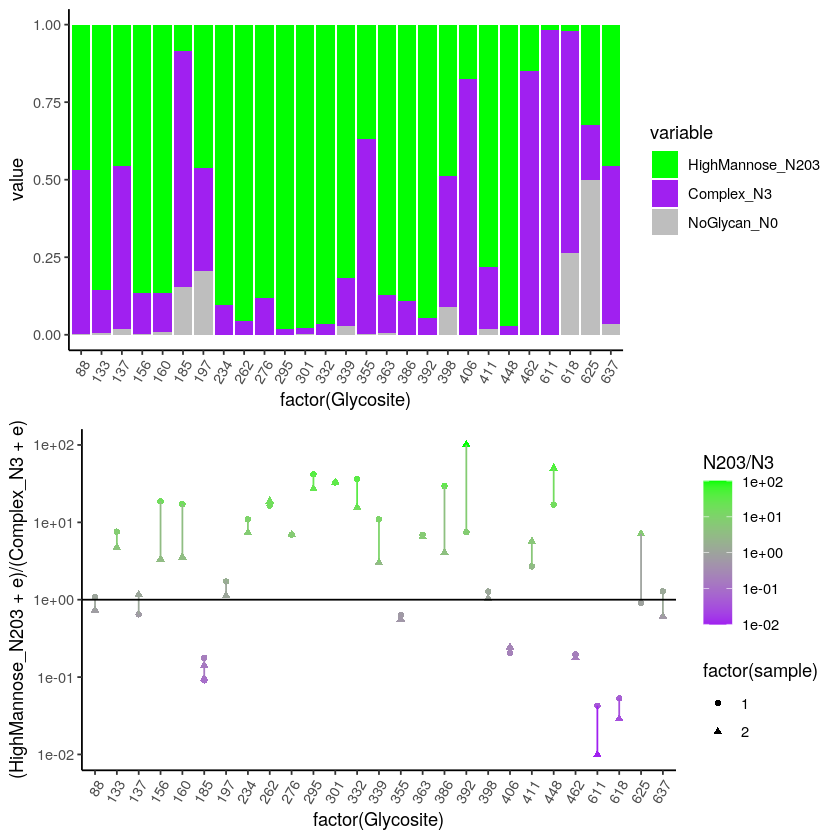

In [16]:
m2 = melt( m[,c('Glycosite','HighMannose_N203','Complex_N3','NoGlycan_N0','sample')] , id.vars = c('Glycosite','sample'))
#m2$variable = relevel(m2$variable,ref=c(''))
e=1e-2
#g1=ggplot(m2,aes(x=factor(Glycosite),y=value,fill=variable))+
#    scale_fill_manual(values = c('green','purple','grey'))+theme_classic()+
#    geom_bar(stat='identity')+#scale_y_log10()+
#    theme(axis.text.x = element_text(angle = 60, hjust = 1))
g2=ggplot(m2,aes(x=factor(Glycosite),y=value,fill=variable))+
    scale_fill_manual(values = c('green','purple','grey'))+
    geom_bar(stat='identity',position = 'fill')+theme_classic()+
    theme(axis.text.x = element_text(angle = 60, hjust = 1))
g3=ggplot(m,aes(x=factor(Glycosite),y=(HighMannose_N203+e)/(Complex_N3+e),color=(HighMannose_N203+e)/(Complex_N3+e)))+
    scale_color_gradient(low = "purple", high = "green",name='N203/N3',trans='log10')+
    geom_point(aes(shape=factor(sample)))+geom_line()+
    #geom_bar(stat='identity')+
    scale_y_log10()+theme_classic()+geom_hline(yintercept = 1)+
    theme(axis.text.x = element_text(angle = 60, hjust = 1))



grid.arrange(grobs=list(g2,g3),nrow=2)
dir.create('figures/04.specific_questions/hiv')

ggsave(g2,filename = 'figures/04.specific_questions/hiv/paulson_highmannose.pdf')
ggsave(g3,filename = 'figures/04.specific_questions/hiv/paulson_highmannose2.pdf')

## Lysine ~ Highmannose check
Here we examine proximate lysines (within 5 Angstroms) for their assocaition with high mannose glycosylation sites. In this examination, we use the high-mannose/complex ratio to indicate the relative preference for high-mannose vs complex glycans; ratio>1 indicates a preference for high-mannose, ratio<1 indicates a preference for complex, ratio=1 indicates no preference.

Comparing the high-mannose/complex ratio directly, it appears that glycosylation sites with no proximal Lysine have effectively no preference for high-mannose or complex as indicated by the median of .794, nearly 1. When a Lysine is nearby, within 5A, the ratio increases dramatically to 3.2 (anova, p=0.015)

Examining the high-mannose/complex ratio in the context of hydrophobicity [Kyte & Doolittle], we see that both factors appear to influence the ratio. In this context, lysine proximity has a 1.85 increase in high-mannose preference (wald, p=0.02897) while hydrophobicity has a 1.05 increase / hydrophobic unit (wald, p=0.018). There is no decernable interaction though both variables appear to incluence mannose preference.

In [17]:
m_tmp = m[m$Glycosite!=611,]
#m_tmp=m
#m_tmp$HighMann_Sum = m_tmp$HighMannose_N203/1
#m_tmp$HighMann_Complex = log( (m_tmp$HighMannose_N203+e)/(m_tmp$Complex_N3+e) , 10)


[1] "median Mann/Complex @K=0: 0.175"

[1] "median Mann/Complex @K=1: -0.0546"

            Df Sum Sq Mean Sq F value Pr(>F)
struct_aa.K  1  0.317  0.3166   2.663  0.108
Residuals   56  6.657  0.1189               

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”

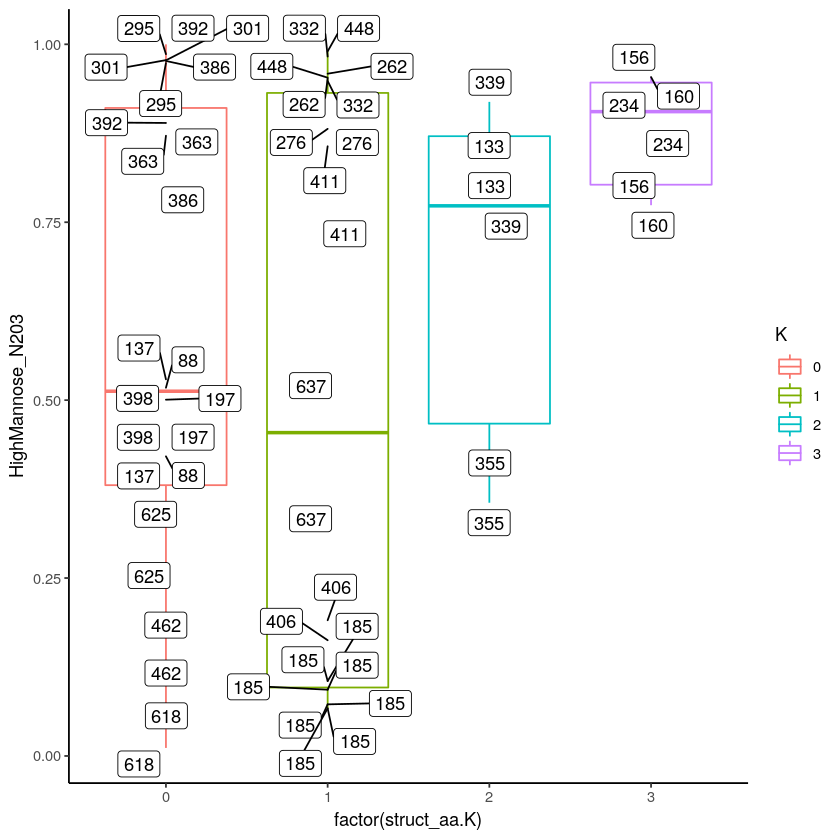


Call:
glm(formula = HighMann_Complex ~ struct_aa.K, data = m_tmp)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.06053  -0.73929  -0.01985   0.62753   2.71100  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.2894     0.1811   1.599    0.116
struct_aa.K   0.1037     0.1379   0.752    0.455

(Dispersion parameter for gaussian family taken to be 1.014892)

    Null deviance: 57.408  on 57  degrees of freedom
Residual deviance: 56.834  on 56  degrees of freedom
AIC: 169.42

Number of Fisher Scoring iterations: 2


`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

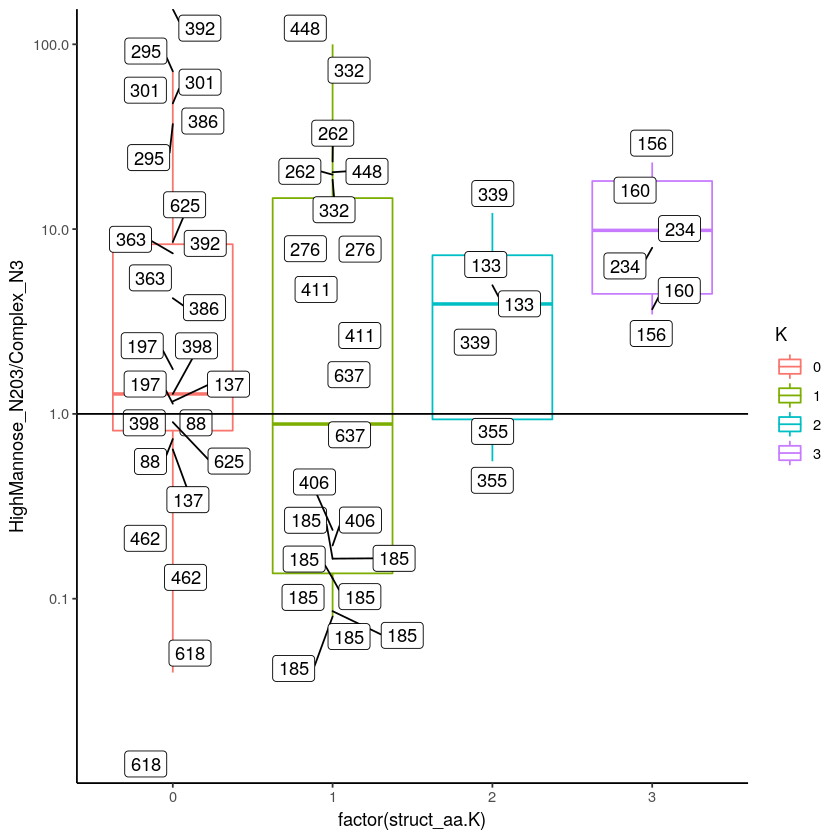


Call:
glm(formula = HighMann_Complex ~ struct_aa.K + seq_hydrophobicity.kd, 
    data = m_tmp)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.59019  -0.71957  -0.04542   0.57531   2.40109  

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)            0.60669    0.19819   3.061  0.00341 **
struct_aa.K            0.07922    0.12887   0.615  0.54125   
seq_hydrophobicity.kd  0.43071    0.14079   3.059  0.00343 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.8830781)

    Null deviance: 57.408  on 57  degrees of freedom
Residual deviance: 48.569  on 55  degrees of freedom
AIC: 162.3

Number of Fisher Scoring iterations: 2


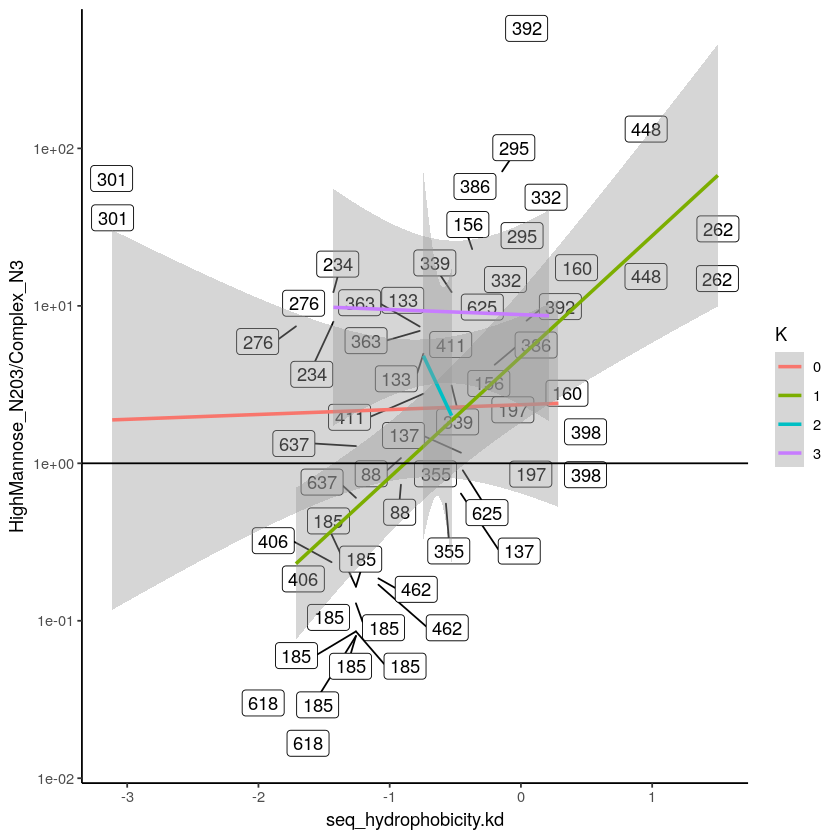

In [8]:

paste('median Mann/Complex @K=0:',signif(with(m_tmp, median( HighMann_Complex[struct_aa.K==0]) ) ,3) )
paste('median Mann/Complex @K=1:',signif(with(m_tmp, median( HighMann_Complex[struct_aa.K==1]) ) ,3) )


ggplot(m_tmp,aes(x=factor(struct_aa.K),color=factor(struct_aa.K),y=HighMannose_N203,label=factor(Glycosite)))+
    geom_boxplot(outlier.shape = NA)+#scale_y_log10()+ 
    guides(color=guide_legend(title="K"))+geom_label_repel(color='black')+
    theme_classic()#+geom_hline(yintercept = 1)


summary(aov( HighMannose_N203~struct_aa.K, data=m_tmp))

ggplot(m_tmp,aes(x=factor(struct_aa.K),color=factor(struct_aa.K),y=HighMannose_N203/Complex_N3,label=factor(Glycosite)))+
    geom_boxplot(outlier.shape = NA)+scale_y_log10()+ guides(color=guide_legend(title="K"))+#geom_jitter()+
    geom_label_repel(color='black')+
    theme_classic()+geom_hline(yintercept = 1)

summary(mod<-glm( HighMann_Complex~struct_aa.K, data=m_tmp))



ggplot(m_tmp,aes(x=seq_hydrophobicity.kd,color=factor(struct_aa.K),y=HighMannose_N203/Complex_N3,label=factor(Glycosite)))+
    scale_y_log10()+ guides(color=guide_legend(title="K"))+#geom_jitter()+
    geom_label_repel(color='black')+stat_smooth(method='lm')+
    theme_classic()+geom_hline(yintercept = 1)

summary(glm( HighMann_Complex~struct_aa.K+seq_hydrophobicity.kd, data=m_tmp))


## Other charged amino acids do not appear to contribute to the Mannose/Complex Ratio

In the case of the HIV envelope, Lysine appears to be the only changed amino acid significantly and substantially associated with high-mannosylation. There is one site with a proximal histadine and extremely high mannosylation. This effect is technically significant (p=.04) but, as it is only one site, we are limited in the conclusions we can draw. 

We attempted aggregating over all positive, all negative, and all chaged amino acids (total number and binary >0). The sum of positive amino acids was significantly associated with increased high-mannose though this effect appears to be mostly due to the lysine effect. The sums of posative, negative and all charged amino acids was not significantly associated with the mannose/complex ratio. The binary presence of positive amino acids was marginally significant (p=0.046), but again, this is likely due to the strength of the lysine effect. Finally, there is no significant additive effect or interaction between the number of positive and negative proximal charged amino acids.

In [44]:
print(1)

[1] 1


TableGrob (3 x 2) "arrange": 6 grobs
            z     cells    name           grob
struct_aa.F 1 (1-1,1-1) arrange gtable[layout]
struct_aa.G 2 (1-1,2-2) arrange gtable[layout]
struct_aa.K 3 (2-2,1-1) arrange gtable[layout]
struct_aa.L 4 (2-2,2-2) arrange gtable[layout]
struct_aa.P 5 (3-3,1-1) arrange gtable[layout]
struct_aa.R 6 (3-3,2-2) arrange gtable[layout]

Warning message:
“Computation failed in `stat_compare_means()`:
argument "x" is missing, with no default”

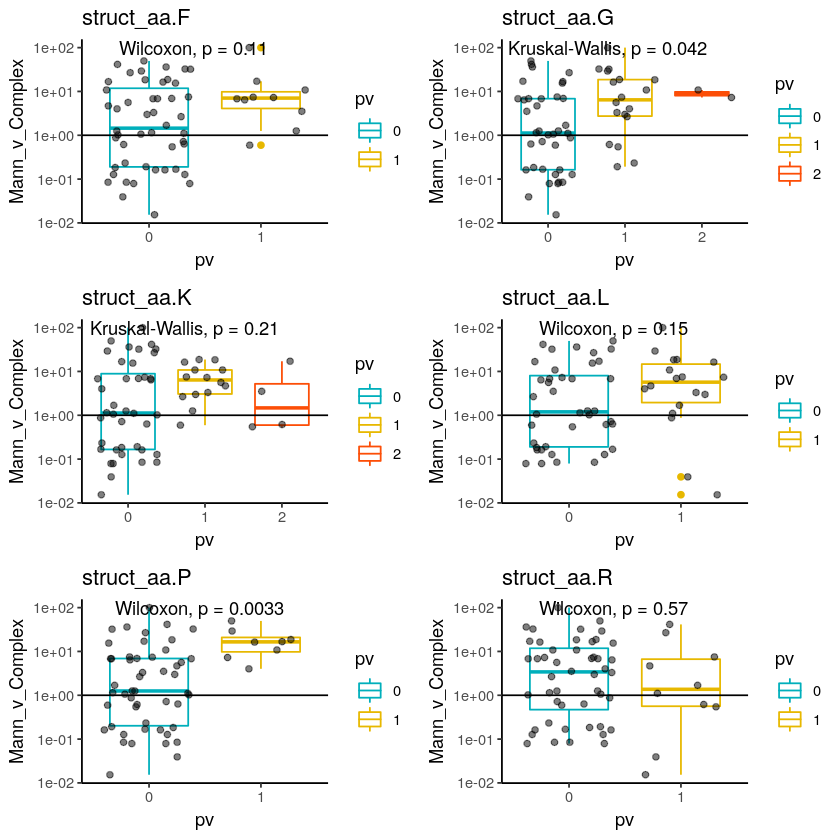

TableGrob (2 x 2) "arrange": 4 grobs
             z     cells    name           grob
seq_aaDown.C 1 (1-1,1-1) arrange gtable[layout]
seq_aaDown.H 2 (1-1,2-2) arrange gtable[layout]
seq_aaDown.N 3 (2-2,1-1) arrange gtable[layout]
seq_aaDown.Q 4 (2-2,2-2) arrange gtable[layout]

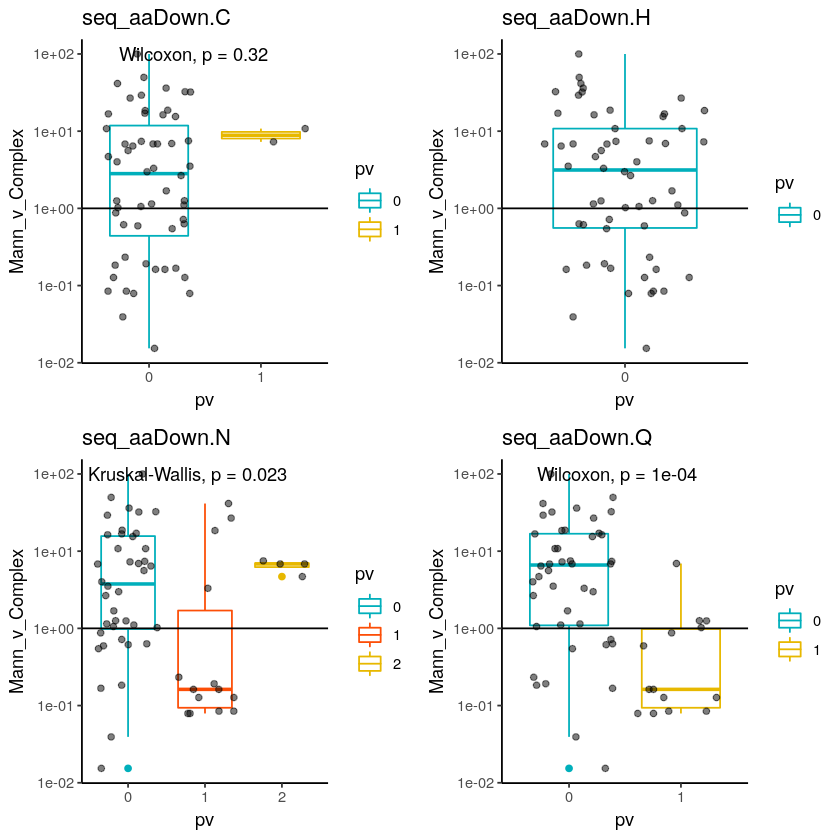

In [32]:
library(ggpubr)
library(ggrepel)

strs_i = grep(paste0('aa.',c('K','P','R','F','G','L'),collapse = '|'),str_vars,value = T)
gL=lapply(strs_i,function(pv_i){ 
    m_tmp$pv = factor(m_tmp[[pv_i]])
    m_tmp$Mann_v_Complex = with(m_tmp,HighMannose_N203/(Complex_N3+e))
    g=ggboxplot(m_tmp,x='pv',color='pv',y='Mann_v_Complex')+
        stat_compare_means()+geom_jitter(alpha=.5)+
        ggtitle(pv_i)+scale_y_log10()+geom_hline(yintercept = 1)+
        scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")[unique(m_tmp$pv)])+
        #geom_text_repel(aes(label=factor(Glycosite)))+
        theme_classic()#+geom_hline(yintercept = 1)

    g
})

names(gL) = strs_i

g=grid.arrange(grobs=gL)
g
ggsave(g,filename='figures/04.specific_questions/hiv/aa_assc.pdf',height=12,width=9)

#############

strs_i = grep(paste0('aaDown.',c('N','C','H','Q'),collapse = '|'),str_vars,value = T)
gL=lapply(strs_i,function(pv_i){
    pv = m_tmp[[pv_i]]
    m_tmp$pv = factor(pv)
    m_tmp$Mann_v_Complex = with(m_tmp,HighMannose_N203/(Complex_N3+e))
    g=ggboxplot(m_tmp,x='pv',color='pv',y='Mann_v_Complex')+
        stat_compare_means()+geom_jitter(alpha=.5)+
        ggtitle(pv_i)+scale_y_log10()+geom_hline(yintercept = 1)+
        scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")[unique(m_tmp$pv)])+
        #geom_text_repel(aes(label=factor(Glycosite)))+
        theme_classic()#+geom_hline(yintercept = 1)

    g
})
names(gL) = strs_i

g=grid.arrange(grobs=gL)
g
ggsave(g,filename='figures/04.specific_questions/hiv/aaDown_assc.pdf',height=8,width=8)

